#Exp10: Historgram Processing

In [1]:
import numpy as np
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import sys

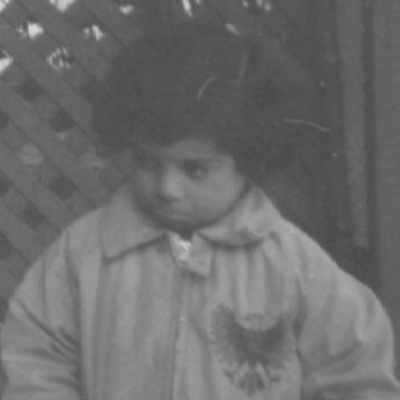

In [2]:
#url = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
url = "https://pbs.twimg.com/profile_images/128974112/smallPout_400x400.png"
#url = "http://eeweb.poly.edu/~yao/EL5123/image/lena_gray.bmp"
image = io.imread(url)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
m,n = gray_image.shape
img=gray_image
ct= np.empty(shape=(m,n),dtype='uint8')

#Histogram Stretching

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

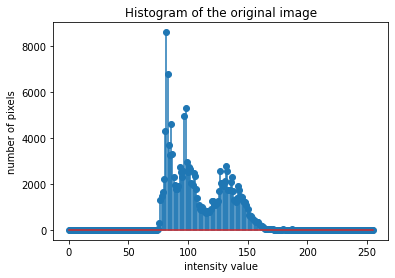

In [3]:
# find frequency of pixels in range 0-255 
img=np.uint8(img)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the original image') 
plt.stem(histr) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


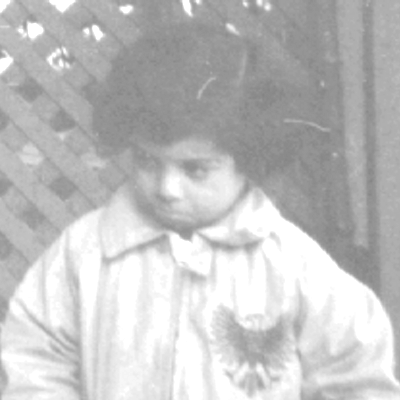

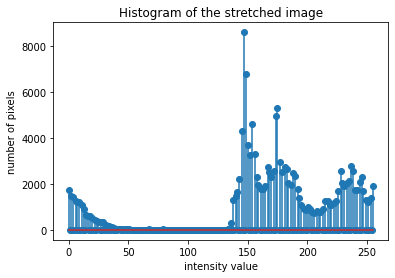

In [4]:
# Transformation to obtain stretching 
constant = (255-0)/(img.max()-img.min()) 
img_stretch = img * constant 
img1=np.uint8(img_stretch)
histr1 = cv2.calcHist([img1],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.stem(histr1) 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the stretched image') 
   
# Storing stretched Image 
cv2.imwrite('Stretched Image 4.png', img_stretch) 
cv2_imshow(img_stretch)

#Histogram Equalization

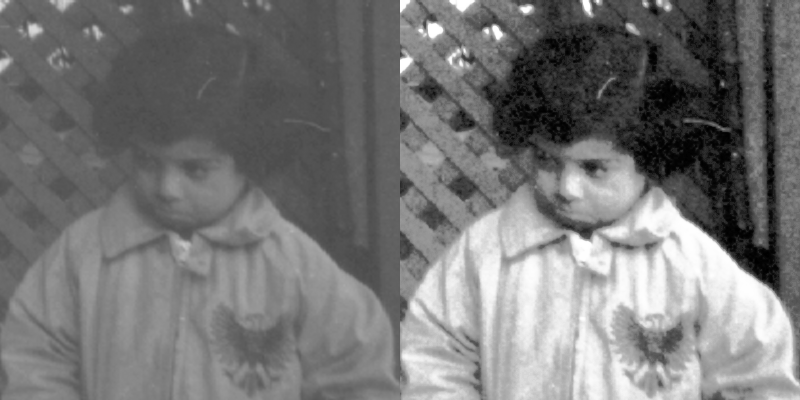

In [5]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2_imshow(res)

#Histogram Matching (Histogram Specification)

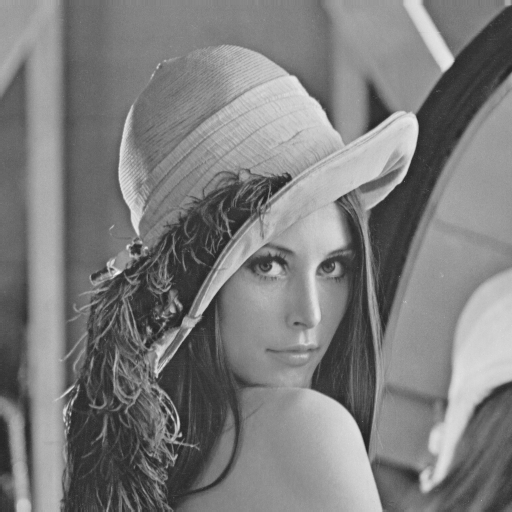

In [6]:
url = "http://eeweb.poly.edu/~yao/EL5123/image/lena_gray.bmp"
image = io.imread(url)
lena = image
cv2_imshow(lena)

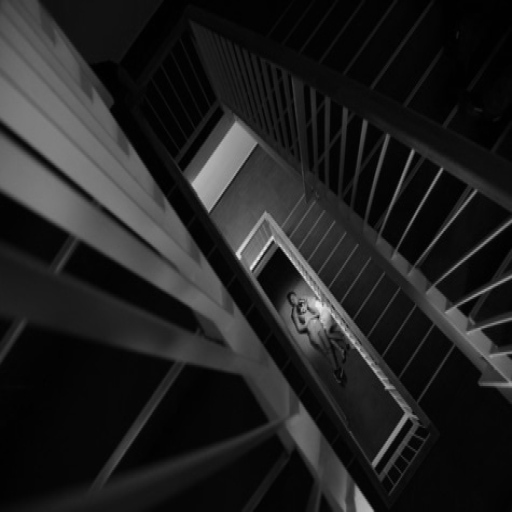

In [7]:
url = "https://pixnio.com/free-images/2020/08/25/2020-08-25-11-11-44-475x317.jpg"
image = io.imread(url)
ascent = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dim = (512,512)
# resize image
resized = cv2.resize(ascent, dim, interpolation = cv2.INTER_AREA)
 
ascent=resized
cv2_imshow(ascent)

Source


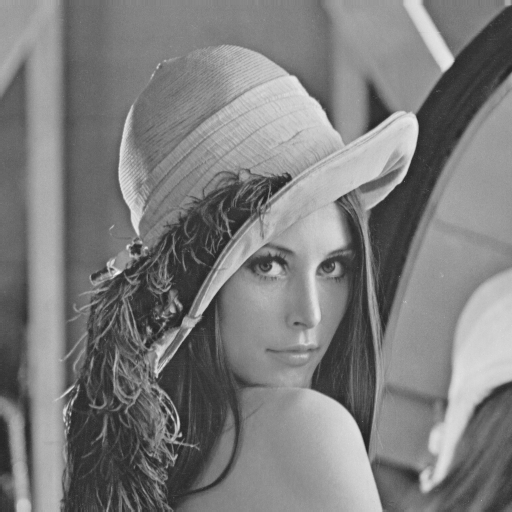

In [8]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image.
    Code adapted from
    http://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x
    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)



from matplotlib import pyplot as plt

source = lena
template = ascent
matched = hist_match(template, source)
print("Source")
cv2_imshow(source)




Template


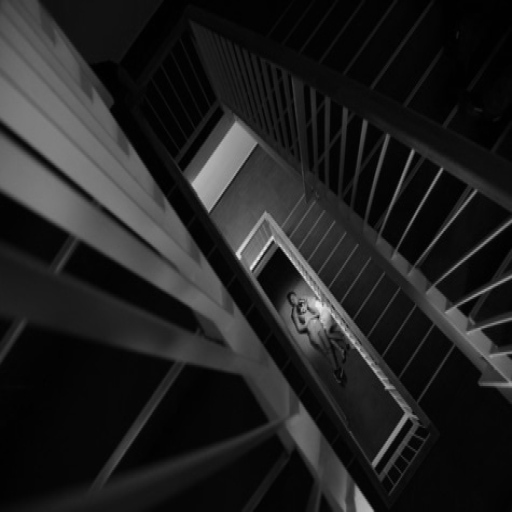

In [9]:
print("Template")
cv2_imshow(template)

Matched


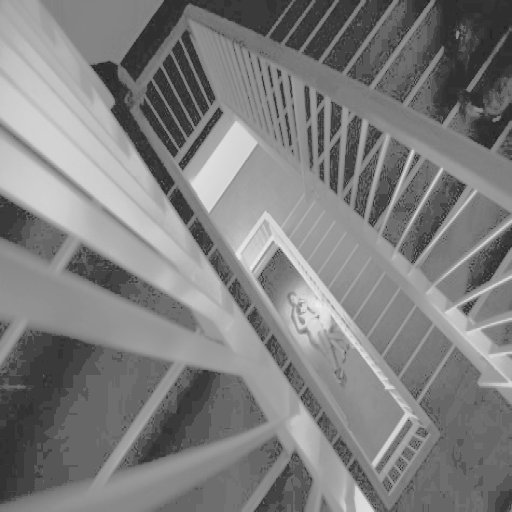

In [10]:
print("Matched")
cv2_imshow(matched)

# **------------xxxxxx----------------xxxxxx-------------------xxxxxx---------------------**

# Programming Exercise 01

## Do histogram stretching of a random image.


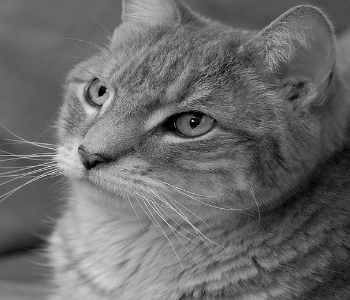

In [11]:
url = "https://i.pinimg.com/originals/ed/13/f4/ed13f42ed7300790d623b1cd78948b15.jpg"

image = io.imread(url)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,(350,300))
cv2_imshow(gray_image)
m,n = gray_image.shape
img=gray_image
ct= np.empty(shape=(m,n),dtype='uint8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

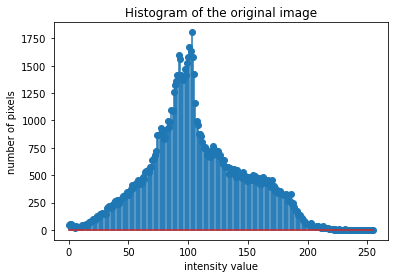

In [12]:
# find frequency of pixels in range 0-255 
img=np.uint8(img)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the original image') 
plt.stem(histr)  



Old Image and Stretched Image


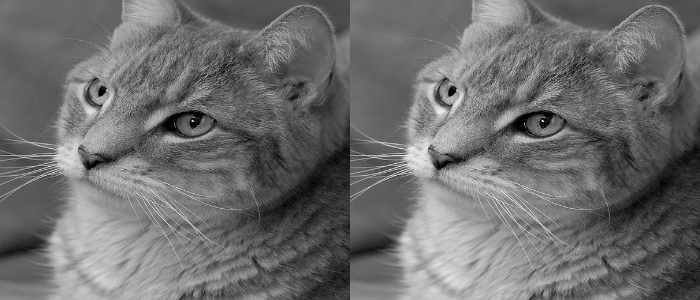

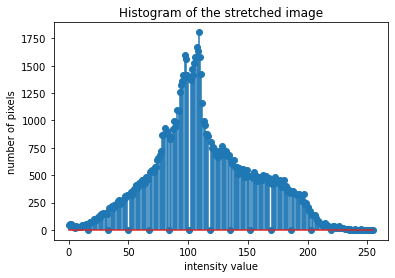

In [13]:
# Transformation to obtain stretching 
constant = (255-0)/(img.max()-img.min()) 
img_stretch = img * constant 
img1=np.uint8(img_stretch)
histr1 = cv2.calcHist([img1],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.stem(histr1,use_line_collection = True) 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the stretched image') 
   
# Storing stretched Image 
cv2.imwrite('Stretched Image 4.png', img_stretch) 
# cv2_imshow(img_stretch)
imggg = np.hstack((gray_image,img_stretch))
print("\n\nOld Image and Stretched Image")
cv2_imshow(imggg)

# Programming Exercise 02

## Do histogram equalization of a low contrast image.

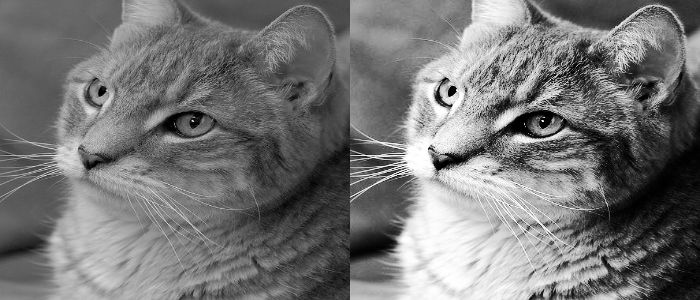

In [14]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2_imshow(res)

# **Initializing Dark and Bright Images for Exercise 3 and 4**

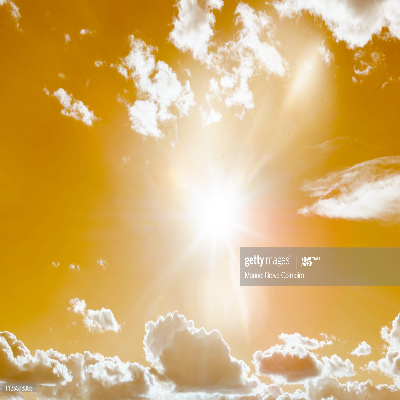

In [15]:
url = "https://media.gettyimages.com/photos/sunny-day-picture-id1135378306?s=2048x2048"
image = io.imread(url)
bright = image
bright = cv2.resize(bright,(400,400))
cv2_imshow(bright)


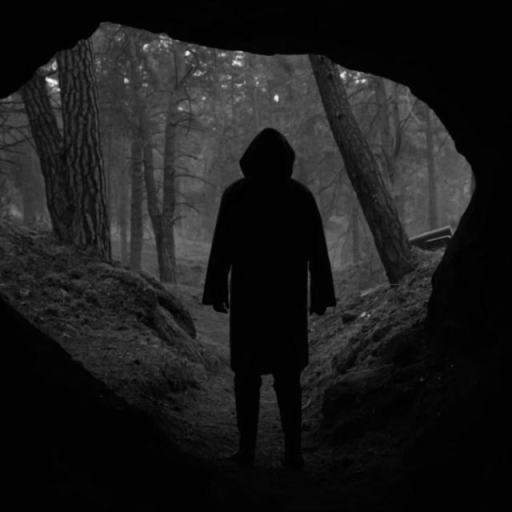

In [16]:

url = "https://lareviewofbooks-org-cgwbfgl6lklqqj3f4t3.netdna-ssl.com/media/image.php?w=640&h=640&zc=1&q=80&src=%2Fwp-content%2Fuploads%2F2020%2F09%2Fdark.feat_.jpg&hash=2c251f71bfd8e06ce815dcf176c79e2c"
image = io.imread(url)
ascent = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dim = (512,512)
# resize image
resized = cv2.resize(ascent, dim, interpolation = cv2.INTER_AREA)
 
dark=resized
cv2_imshow(dark)

# Programming Exercise 03

## Do histogram matching of a bright image to a dark image.

Source


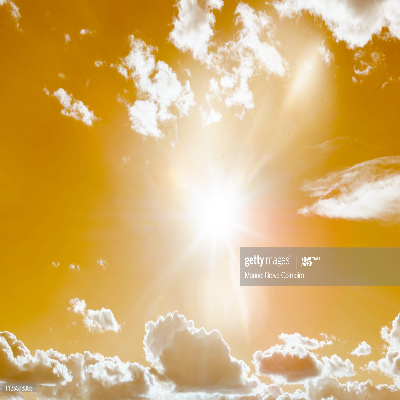

Template


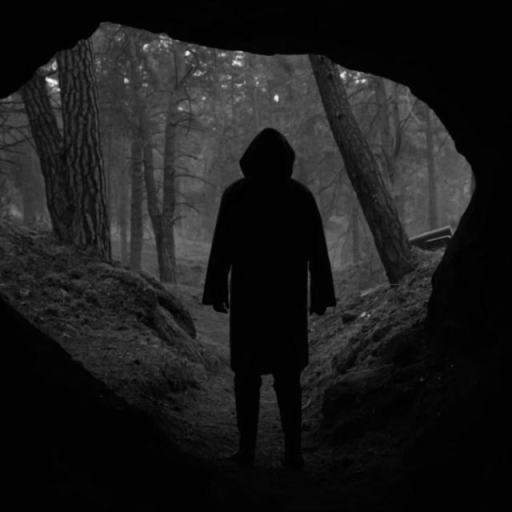

matched


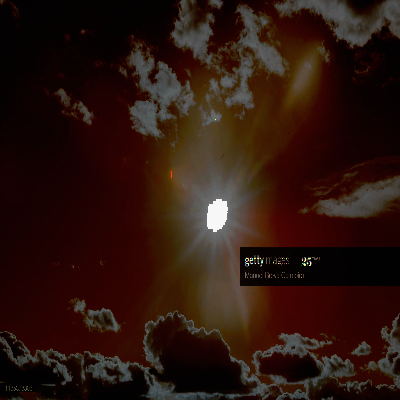

In [17]:
source = bright
template = dark
matched = hist_match(bright, dark)
print("Source")
cv2_imshow(source)
print("Template")
cv2_imshow(template)
print("matched")
cv2_imshow(matched)

# Programming Exercise 04


## Do histogram matching of a dark image to a bright image.

Source


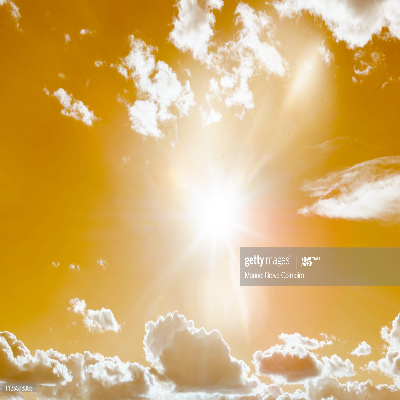

Template


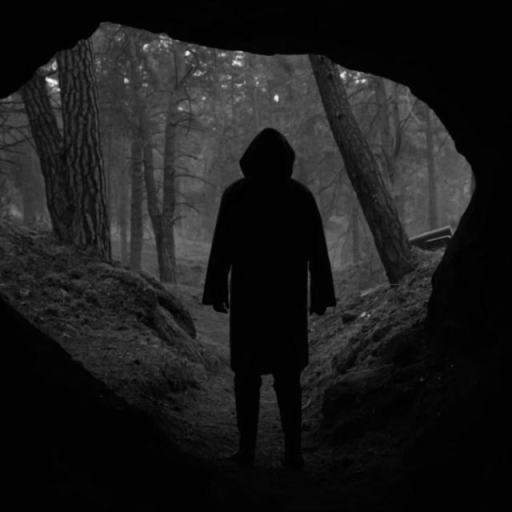

matched


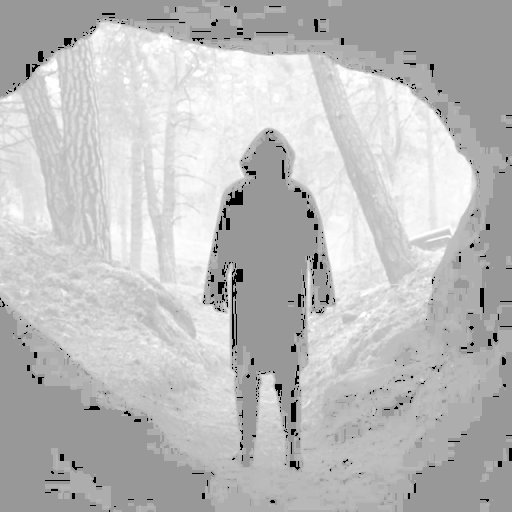

In [18]:
source = bright
template = dark
matched = hist_match(dark, bright)
print("Source")
cv2_imshow(source)
print("Template")
cv2_imshow(template)
print("matched")
cv2_imshow(matched)